<a href="https://colab.research.google.com/github/nezhalahnech/lfc-tweet-analysis/blob/master/charo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Trabajo final***
# ***Nezha Lahnech***
# ***datasets stroke***

## **importar librerias**

In [30]:
from matplotlib import pyplot
import pandas as pd
import numpy as np


* *leer y descubrir el contenido del dataset storke*

In [31]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/nezhalahnech/lfc-tweet-analysis/master/healthcare-dataset-stroke-data.csv', delimiter=',', na_values='?')
# summarize the shape of the dataset
print(df.shape)

(5110, 12)


In [2]:
# summarize each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1. Borrado de duplicados.

* *Lo primero que debemos hacer es comprobar si tenemos instancias duplicadas y si las hubiera eliminarlas.*

In [5]:
df.duplicated().sum()

0

*en este No tenemos instancias repetidas*

## 2. Tratamiento de valores nulos

Veamos cuántos valores nulos hay. Si contienen muchos valores nulos será preferible usar alguna técnica de imputación y asignarles un valor.

In [32]:
df.isnull().any(axis=1).sum()

201

In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 2.1. Borrado de instancias con valores nulos.

Continuamos borrando las instancias con valores nulos.

In [8]:
df_clean = df.dropna(inplace=False)

In [9]:
print(df_clean.shape)
print(df.shape)

(4909, 12)
(5110, 12)


*Vemos como hemos eliminado las instancias que contenían alguna columna con valores null.*

### 2.2. Imputación de valores nulos.

In [10]:
#creamos una variable X que tendrá las características de nuestros datos menos la variable objetivo
X = df.drop('stroke', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

In [11]:
from sklearn.impute import SimpleImputer
from numpy import isnan

imputer = SimpleImputer(strategy='most_frequent')
Xtrans = imputer.fit_transform(X)

In [12]:
# 1. Con el dataset df_clean (instancias con nulos elimiminadas) obtenemos X e y
X = df_clean.drop('stroke', axis=1).astype('str')
#creamos una variable y que tendrá sólo la variable objetivo
y = df_clean['stroke']

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

# define the model
model = LogisticRegression()

pipeline = Pipeline(steps=[('oh', onehot_encoder ), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean Accuracy: 0.956 (0.001)


In [13]:
# 2. Con el dataset df (con nulos): imputación del más frecuente y onehot encoder (instancias con nulos elimiminadas) obtenemos X e y
X = df.drop('stroke', axis=1).astype('str')
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# one-hot encode input variables
imputer = SimpleImputer(strategy='most_frequent')
onehot_encoder = OneHotEncoder(handle_unknown='ignore')   #.astype('str')

# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

# define the model
model = LogisticRegression()

pipeline = Pipeline(steps=[('i', imputer), ('oh', onehot_encoder ), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean Accuracy: 0.950 (0.002)


In [14]:
# 2. Con el dataset df (con nulos), onehot encoder y después imputación (instancias con nulos elimiminadas) obtenemos X e y
X = df.drop('stroke', axis=1).astype('str')  #ojo, mostrar que si no es 'str' o 'int' o 'category' da nan.
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# one-hot encode input variables
imputer = SimpleImputer(strategy='median') 
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

# define the model
model = LogisticRegression()

pipeline = Pipeline(steps=[('oh', onehot_encoder ), ('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.950 (0.002)


In [15]:
print(df.info())
print(df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN   

In [16]:
df['id']=df['id'].astype(dtype='category')   #Uso esta vez el tipo category
df['gender']=df['gender'].astype(dtype='category')
df['age']=df['age'].astype(dtype='category')
df['hypertension']=df['hypertension'].astype(dtype='category')
df['heart_disease']=df['heart_disease'].astype(dtype='category')
df['ever_married']=df['ever_married'].astype(dtype='category')
df['work_type']=df['work_type'].astype(dtype='category')
df['Residence_type']=df['Residence_type'].astype(dtype='category')
df['avg_glucose_level']=df['avg_glucose_level'].astype(dtype='category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   category
 1   gender             5110 non-null   category
 2   age                5110 non-null   category
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   category
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
dtypes: category(9), float64(1), int64(1), object(1)
memory usage: 509.6+ KB


In [17]:
X = df.drop('stroke', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

import numpy as np 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_features = ["bmi", "smoking_status", "stroke" ]
numeric_transformer = Pipeline(
    #steps=[("imputer", KNNImputer()), ("scaler", MinMaxScaler())]  #Le añado un MinMaxScaler --> 86.2%
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())] #--> 86,4%
)

categorical_features = ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level"]  
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),  ("oneHotE", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)


# define the model
model = LogisticRegression()

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

In [18]:
# 1. Con el dataset df_clean (instancias con nulos elimiminadas) obtenemos X e y
X = df_clean.drop('stroke', axis=1).astype('str')
#creamos una variable y que tendrá sólo la variable objetivo
y = df_clean['stroke']

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

# define the model
model = LogisticRegression()

pipeline = Pipeline(steps=[('oh', onehot_encoder ), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.956 (0.001)


In [19]:
#solo un train_tes_split para ver qué ocurre
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df_clean.drop('stroke', axis=1)
y = df_clean['stroke']
# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

oneHot=OneHotEncoder(handle_unknown='ignore')
X=oneHot.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.8,
                                        random_state = 50,
                                        shuffle      = True
                                    )

logistic_regression = LogisticRegression(max_iter = 1000000000 )
logistic_regression.fit(X_train, y_train)
y_pred_logistic_regression = logistic_regression.predict(X_test)
print(accuracy_score(y_test,y_pred_logistic_regression))

0.9582484725050916


In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
X = df_clean.drop('stroke', axis=1)
y = df_clean['stroke']
# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

oneHot=OneHotEncoder(handle_unknown='ignore')
X=oneHot.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.8,
                                        random_state = 50,
                                        shuffle      = True
                                    )

decision_tree = DecisionTreeClassifier(random_state=50)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
print(accuracy_score(y_test,y_pred_decision_tree))

0.9501018329938901


In [21]:
# 1. Con el dataset df_clean (instancias con nulos elimiminadas) obtenemos X e y
X = df_clean.drop('stroke', axis=1).astype('str')
#creamos una variable y que tendrá sólo la variable objetivo
y = df_clean['stroke']

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

# define the model
model = RandomForestClassifier(random_state=50)

pipeline = Pipeline(steps=[('oh', onehot_encoder ), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.957 (0.001)


In [22]:
X = df_clean.drop('stroke', axis=1)
y = df_clean['stroke']
# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

oneHot=OneHotEncoder(handle_unknown='ignore')
X=oneHot.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.8,
                                        random_state = 50,
                                        shuffle      = True
                                    )


random_forest = RandomForestClassifier(random_state=50)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print(accuracy_score(y_test,y_pred_random_forest))

0.9582484725050916


In [23]:
X = df.drop('stroke', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

import numpy as np 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_features = ["bmi", "smoking_status", "stroke"]
numeric_transformer = Pipeline(
    #steps=[("imputer", KNNImputer())]  #0.874
    #steps=[("imputer", KNNImputer()), ("scaler", MinMaxScaler())]  #0.874
    #steps=[("imputer", SimpleImputer(strategy="mean"))] #0.879
    #steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", MinMaxScaler())] #0.879
    #steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())] #0.876
    #steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())] #0.876
    #steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler(quantile_range=(15.0, 100-15)))] #0.877
    #steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler(quantile_range=(25.0, 75)))] #0.877
    steps=[("imputer", SimpleImputer(strategy="mean"))] #0.879
    #steps=[("imputer", IterativeImputer(imputation_order='random', initial_strategy='median')), ("scaler", RobustScaler())] #0.876
)

categorical_features = ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level"]  
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),  ("oneHotE", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)


# define the model
model = RandomForestClassifier(random_state=50)

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

In [24]:
X = df.drop('stroke', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

In [25]:
X.isna().sum() #Comprobamos que están los nulos

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64

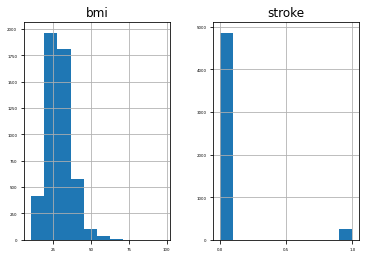

In [26]:
from matplotlib import pyplot
fig = df.hist(xlabelsize=4, ylabelsize=4)
#[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [27]:
X = df.drop('stroke', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

import numpy as np 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

numeric_features = ["bmi", "smoking_status", "stroke"]
numeric_transformer = Pipeline(
    #steps=[("imputer", SimpleImputer(strategy="mean")), ('scaler', MinMaxScaler(feature_range=(1, 2))),('power',PowerTransformer(method='box-cox'))] 
    #steps=[("imputer", SimpleImputer(strategy="mean")), ('scaler', MinMaxScaler(feature_range=(0, 1))),('power',PowerTransformer(method='box-cox'))] #nan 
    #steps=[("imputer", SimpleImputer(strategy="mean")), ('scaler', StandardScaler()),('power',PowerTransformer(method='yeo-johnson'))] #powerTransforer no aporta nada al usar Random Forest
    steps=[("imputer", SimpleImputer(strategy="mean"))] 
)

categorical_features = ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level"]  
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),  ("oneHotE", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        
    ]
)
# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)


# define the model
model = RandomForestClassifier(random_state=50)

# evaluate model
for k_features in [2,5,7,10, 'all']:
    sel = SelectKBest(score_func=mutual_info_classif, k=k_features)  #Mutual information
    #gauss = PowerTransformer(method='yeo-johnson')
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               #('gauss', gauss),  #No aportará nada a este estimador.
                               ('sel', sel),
                               ('m', model)])
    # evaluate the pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

Accuracy: nan (nan)
Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

In [28]:
X = df.drop('stroke', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

import numpy as np 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE

numeric_features = ["bmi", "smoking_status", "stroke"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean"))] #0.879
)

categorical_features = ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level"]  
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),  ("oneHotE", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)


# define the model
model = RandomForestClassifier(random_state=50)

# evaluate model
for k_features in [2,5,7,10,15]:
    sel = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=k_features)

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('sel', sel),
                               ('m', model)])
    # evaluate the pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

Accuracy: nan (nan)
Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520

In [29]:
X = df.drop('stroke', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['stroke']

import numpy as np 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

numeric_features = ["bmi", "smoking_status", "stroke"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean"))] 
)

categorical_features = ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level"]  
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),  ("oneHotE", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        
    ]
)
# ordinal encode target variable
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)


# define the model
model = RandomForestClassifier(random_state=50)

# evaluate model
sel = SelectKBest(score_func=mutual_info_classif, k=k_features)  #Mutual information
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('sel', sel),
                           ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 520